# Librerías y cosas útiles

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import agente_GW 
import ambiente_GW 

import sys 
sys.path.append('..')

import learner_qlearning 

In [43]:
from matplotlib import pyplot as plt
from matplotlib import colors
import pandas as pd 
import numpy as np 
import pickle 

In [44]:
def get_right_orger_matrix(matrix: np.array) -> np.array:
    dimension = len(matrix)
    right_order_matrix = np.zeros((dimension, dimension))

    for i in range(dimension): 
        for j in range(dimension): 
            right_order_matrix[i,j] = matrix[dimension - i - 1, j]
    return right_order_matrix

In [77]:
def get_values_from_qvalues(q_values):
    values = {}
    state_action_value = [(k[0], k[1], v) for k, v in q_values.items()]
    df = pd.DataFrame(state_action_value, columns = ['state', 'action', 'qvalue'])

    for s in df.state.unique():
        df_s = df.loc[(df.state == s)]
        qvalue_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].qvalue
        values[s] = round(qvalue_s,2) 
        
    return values

In [81]:
def paint_board_with_values(board, values, path = None):
    dimension = len(board)

    fig = plt.figure(figsize=(dimension+2, dimension))
    cmap = colors.ListedColormap(['grey', 'red',  'white', 'green','blue']) 
    bounds = [-3.5, -2.5, -0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    right_order_board = get_right_orger_matrix(board)

    heatmap = plt.pcolor(right_order_board, cmap = cmap, norm = norm, alpha=0.7)
    plt.colorbar(heatmap)

    plt.grid(which="both", color="black", linestyle='-', linewidth=0.2)
    plt.xticks(range(dimension))
    plt.yticks(range(dimension), range(dimension, 0, -1))

    for i in range(dimension):
        for j in range(dimension):
            try:  plt.text(j + 0.2, dimension - 1 - i + 0.4, values[i,j], fontsize = 'x-large')
            except: continue

    fig.tight_layout()
    if not path is None: plt.savefig(path)
    plt.show()
    plt.close()

    return fig 

In [45]:
def get_policy_from_qvalues(q_values):
    policy = {}
    state_action_value = [(k[0], k[1], v) for k, v in q_values.items()]
    df = pd.DataFrame(state_action_value, columns = ['state', 'action', 'qvalue'])

    for s in df.state.unique():
        df_s = df.loc[(df.state == s)]
        action_s = df_s.loc[df_s.qvalue == df_s.qvalue.max()].iloc[0].action
        policy[s] = action_s 
        
    return policy

In [68]:
def paint_board_with_policy(board, policy, path = None):
    dimension = len(board)

    fig = plt.figure(figsize=(dimension+2, dimension))
    cmap = colors.ListedColormap(['grey', 'red',  'white', 'green','blue']) 
    bounds = [-3.5, -2.5, -0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    right_order_board = get_right_orger_matrix(board)

    heatmap = plt.pcolor(right_order_board, cmap = cmap, norm = norm, alpha=0.7)
    plt.colorbar(heatmap)

    plt.grid(which="both", color="black", linestyle='-', linewidth=0.2)
    plt.xticks(range(dimension))
    plt.yticks(range(dimension), range(dimension, 0, -1))

    for i in range(dimension):
        for j in range(dimension):
            try: 
                action = policy[i,j]
                symbol = ''
                if action == 'up': symbol = '↑'
                elif action == 'down': symbol = '↓'
                elif action == 'right': symbol = '→'
                elif action == 'left': symbol = '←'
                elif action == 'exit': symbol = '*'
                plt.text(j + 0.4,dimension - 1 - i + 0.4, symbol, fontsize = 'xx-large')
            except: continue 
    fig.tight_layout()
    if not path is None: plt.savefig(path)
    plt.show()
    plt.close()

    return fig 

# Inicialización de valores

In [47]:
env = ambiente_GW.EnvironmentGridWorld()
agent = agente_GW.AgentGridWorld(env)

In [48]:
learner = learner_qlearning.QLearning( env = env, agent = agent,  
                            epsilon = 0.8, alpha = 0.4, gamma = 0.9,
                            decrease_alpha = 0.01, exploration_decreasing_decay = 0.01,
                            num_episodes_batch = 500)

# Q learning

In [49]:
epsilons, alphas, rewards, steps = learner.qlearning()

--> Episode 10. Reward: -6.0. Steps: 483 Epsilon: 0.8. Alpha: 0.4
--> Episode 20. Reward: -7.0. Steps: 213 Epsilon: 0.8. Alpha: 0.4
--> Episode 30. Reward: 1.0. Steps: 181 Epsilon: 0.8. Alpha: 0.4
--> Episode 40. Reward: -14.0. Steps: 257 Epsilon: 0.8. Alpha: 0.4
--> Episode 50. Reward: 0.0. Steps: 39 Epsilon: 0.8. Alpha: 0.4
--> Episode 60. Reward: -19.0. Steps: 370 Epsilon: 0.8. Alpha: 0.4
--> Episode 70. Reward: -1.0. Steps: 126 Epsilon: 0.8. Alpha: 0.4
--> Episode 80. Reward: -8.0. Steps: 90 Epsilon: 0.8. Alpha: 0.4
--> Episode 90. Reward: 1.0. Steps: 184 Epsilon: 0.8. Alpha: 0.4
--> Episode 100. Reward: 1.0. Steps: 34 Epsilon: 0.8. Alpha: 0.4
--> Episode 110. Reward: 0.0. Steps: 82 Epsilon: 0.8. Alpha: 0.4
--> Episode 120. Reward: 1.0. Steps: 151 Epsilon: 0.8. Alpha: 0.4
--> Episode 130. Reward: 1.0. Steps: 82 Epsilon: 0.8. Alpha: 0.4
--> Episode 140. Reward: 1.0. Steps: 95 Epsilon: 0.8. Alpha: 0.4
--> Episode 150. Reward: -6.0. Steps: 114 Epsilon: 0.8. Alpha: 0.4
--> Episode 160.

# Resultados

In [50]:
with open('result_gridworld.pickle', 'wb') as handle:
    pickle.dump((learner, env, agent, epsilons, alphas, rewards, steps), handle, protocol=pickle.HIGHEST_PROTOCOL)

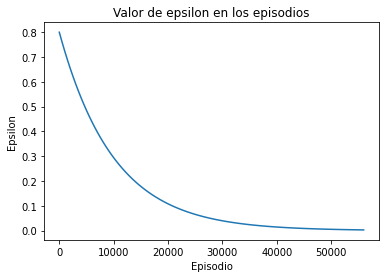

In [73]:
plt.plot(range(1,len(epsilons)*500, 500), epsilons) 
plt.title('Valor de epsilon en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.savefig('results/epsilon.png')

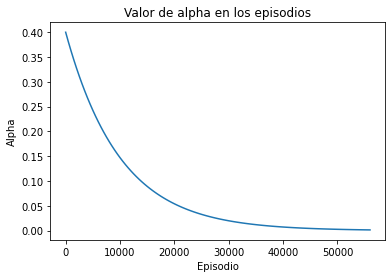

In [72]:
plt.plot(range(1,len(epsilons)*500, 500), alphas)
plt.title('Valor de alpha en los episodios')
plt.xlabel('Episodio')
plt.ylabel('Alpha')
plt.savefig('results/alpha.png')

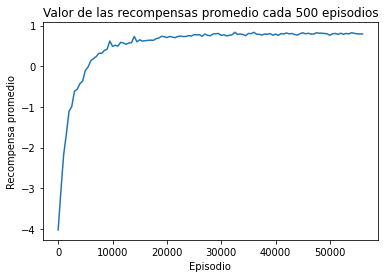

In [71]:
plt.plot(range(1,len(epsilons)*500, 500), rewards)
plt.title('Valor de las recompensas promedio cada 500 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa promedio')
plt.savefig('results/recompensa_promedio.png')

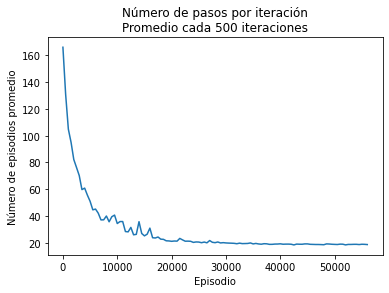

In [70]:
plt.plot(range(1,len(epsilons)*500, 500), steps)
plt.title('Número de pasos por iteración\nPromedio cada 500 iteraciones')
plt.xlabel('Episodio')
plt.ylabel('Número de episodios promedio')
plt.savefig('results/numero_pasos_promedio.png')

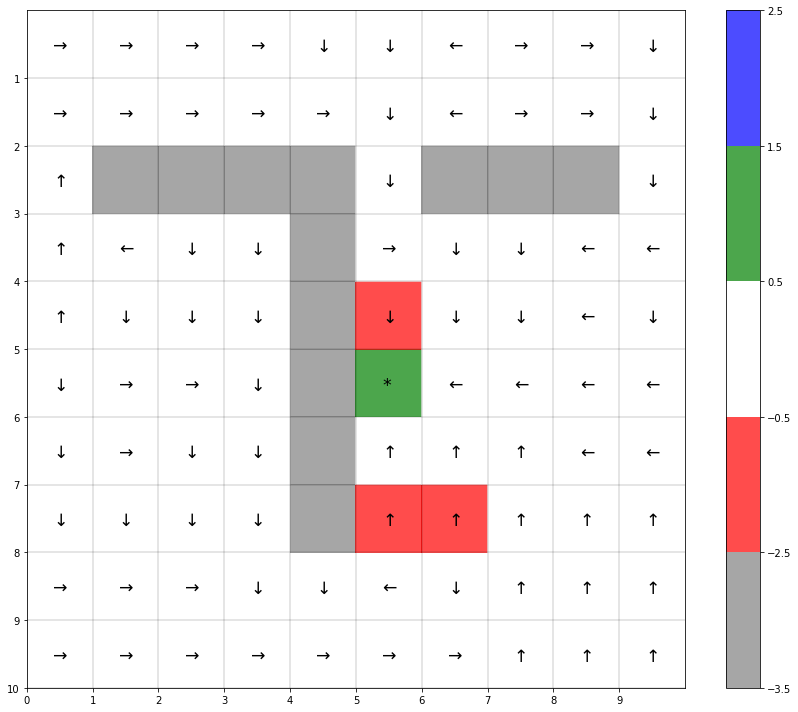

In [69]:
policy = get_policy_from_qvalues(learner.Q)
fig = paint_board_with_policy(env.board, policy, path = 'results/policy.png')

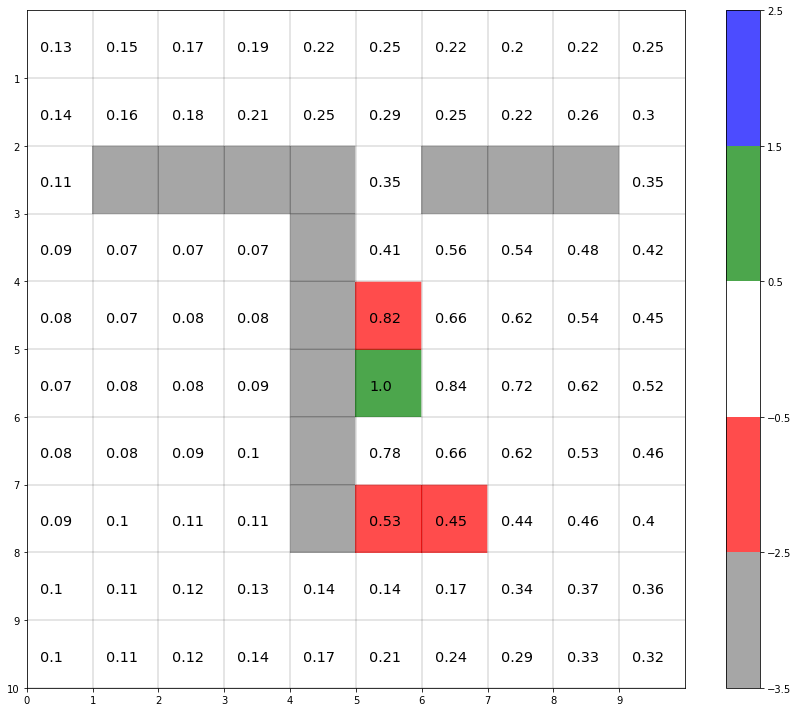

In [82]:
values = get_values_from_qvalues(learner.Q)
fig = paint_board_with_values(env.board, values, path = 'results/values.png')